In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [26]:
admin = pd.read_csv('Admin.csv')
lab = pd.read_csv('Labs.csv')

adminDF = pd.DataFrame(admin)
labDF = pd.DataFrame(lab)

print(f"Admin CSV:\n{adminDF.head()}\n")
print(f"Lab CSV:\n{labDF.head()}")

Admin CSV:
   ID    Med  Admin Date     Units
0   1  Med A  02/07/2012  1,500.00
1   1  Med A  06/07/2012  1,500.00
2   1  Med A  09/07/2012  1,500.00
3   1  Med A  11/07/2012  1,500.00
4   1  Med A  13/07/2012  1,500.00

Lab CSV:
    ID DRAW_DATE LAB_RESULT_CODE LAB_VALUE
0  1.0    04-Jul           LAB A       679
1  1.0    01-Aug           LAB A       621
2  1.0    05-Sep           LAB A       915
3  1.0    03-Oct           LAB A       848
4  1.0    07-Nov           LAB A       845


In [27]:
adminDF.info(), labDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2022 non-null   int64 
 1   Med         2022 non-null   object
 2   Admin Date  2022 non-null   object
 3   Units       2022 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2095 non-null   float64
 1   DRAW_DATE        2397 non-null   object 
 2   LAB_RESULT_CODE  2397 non-null   object 
 3   LAB_VALUE        2397 non-null   object 
dtypes: float64(1), object(3)
memory usage: 75.0+ KB


(None, None)

In [28]:
adminDF.columns = ['Id', 'med', 'admin_date', 'units']
labDF.columns = ['Id', 'draw_date', 'lab_result_code', 'lab_value']

In [29]:
adminDF['units'] = adminDF['units'].str.replace(',','').astype('float64')
labDF['lab_value'] = pd.to_numeric(labDF['lab_value'], errors='coerce')

In [30]:

adminDF['admin_date'] = pd.to_datetime(adminDF['admin_date'], format='%d/%m/%Y')
adminDF['admin_date'] = adminDF['admin_date'].dt.to_period('M')

adminDF

,Id,med,admin_date,units
0,1,Med A,2012-07,1500.0
1,1,Med A,2012-07,1500.0
2,1,Med A,2012-07,1500.0
3,1,Med A,2012-07,1500.0
4,1,Med A,2012-07,1500.0
...,...,...,...,...
2017,129,Med A,2012-08,5200.0
2018,129,Med A,2012-08,5200.0
2019,129,Med A,2012-09,5200.0
2020,129,Med A,2012-09,6500.0


In [31]:
adminDF.describe()

,Id,units
count,2022.000000,2022.000000
mean,66.767557,4805.909496
std,37.973341,4884.836594
min,1.000000,1.000000
25%,32.250000,1300.000000
50%,67.000000,3500.000000
75%,100.000000,6300.000000
max,129.000000,20000.000000


Total Monthly Medication Usage: What is the total number of units administered for each medication in each month across all patients?

In [32]:
monthly_usage = adminDF.groupby(['admin_date', 'med'], sort=True)['units'].sum().reset_index()
monthly_usage['admin_date'] = monthly_usage['admin_date'].dt.strftime('%b')

monthly_usage.columns = ['Month', 'Medication', 'Total_Units']
monthly_usage

,Month,Medication,Total_Units
0,Jul,Med A,4303700.0
1,Aug,Med A,4477100.0
2,Sep,Med A,849900.0
3,Sep,Med B,535.0
4,Oct,Med B,393.0
5,Nov,Med A,75300.0
6,Nov,Med B,420.0
7,Dec,Med A,10200.0
8,Dec,Med B,1.0


In [40]:
monthly_usage.isnull().count()

Month          9
Medication     9
Total_Units    9
dtype: int64

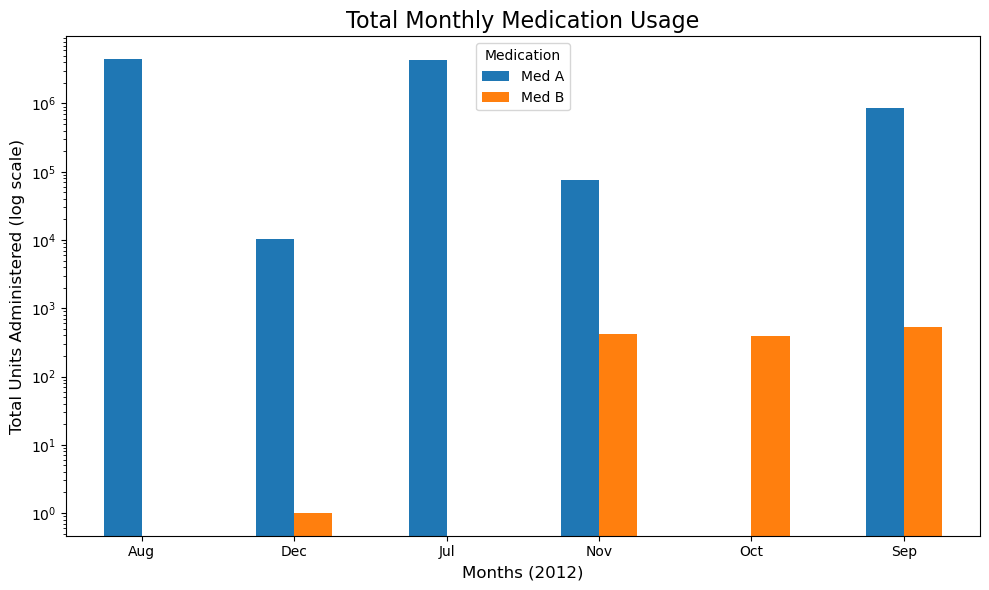

In [33]:
# Plot the bar plot
monthly_usage_pivot = monthly_usage.pivot(index='Month', columns='Medication', values='Total_Units')

# Total units of Med A and Med B have large difference
# Set logy=True for logarithmic scale
monthly_usage_pivot.plot(kind='bar', figsize=(10, 6), logy=True)

plt.title('Total Monthly Medication Usage', fontsize=16)
plt.xlabel('Months (2012)', fontsize=12)
plt.ylabel('Total Units Administered (log scale)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Patient Counts on Each Medication: How many patients received Medication A and Medication B from July to November?

In [34]:
filtered_data = adminDF[(adminDF['admin_date'] >= '2012-07') & (adminDF['admin_date'] <= '2012-11')]
filtered_data['month'] = filtered_data['admin_date'].dt.strftime('%b') 

patient_count = filtered_data.groupby(['month', 'med'], sort=False)['Id'].nunique().reset_index()

patient_count.columns = ['Month', 'Medication', 'Patient_Count']
patient_count

,Month,Medication,Patient_Count
0,Jul,Med A,92
1,Aug,Med A,92
2,Sep,Med A,73
3,Sep,Med B,76
4,Oct,Med B,66
5,Nov,Med B,72
6,Nov,Med A,4


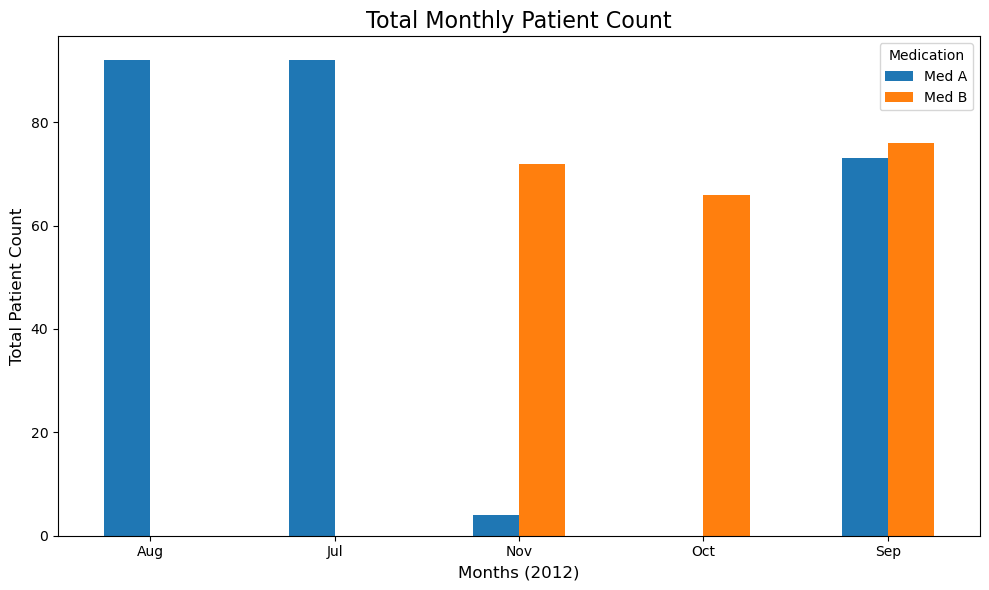

In [35]:
# Plot the bar plot
patient_count_pivot = patient_count.pivot(index='Month', columns='Medication', values='Patient_Count')

patient_count_pivot.plot(kind='bar', figsize=(10, 6))

plt.title('Total Monthly Patient Count', fontsize=16)
plt.xlabel('Months (2012)', fontsize=12)
plt.ylabel('Total Patient Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Average Monthly Dose per Patient: What is the average total monthly dose per patient for each medication from July to November

In [36]:
dose_per_patient = filtered_data.groupby(['month', 'med', 'Id'], sort=False)['units'].sum().reset_index()

avg_dose_per_patient = dose_per_patient.groupby(['month', 'med'], sort=False)['units'].mean().reset_index()

avg_dose_per_patient['units'] = round(avg_dose_per_patient['units'], 2)

avg_dose_per_patient.columns = ['Month', 'Medication', 'Avg_Dose_Per_Patient']
avg_dose_per_patient

,Month,Medication,Avg_Dose_Per_Patient
0,Jul,Med A,46779.35
1,Aug,Med A,48664.13
2,Sep,Med A,11642.47
3,Sep,Med B,7.04
4,Oct,Med B,5.95
5,Nov,Med B,5.83
6,Nov,Med A,18825.00


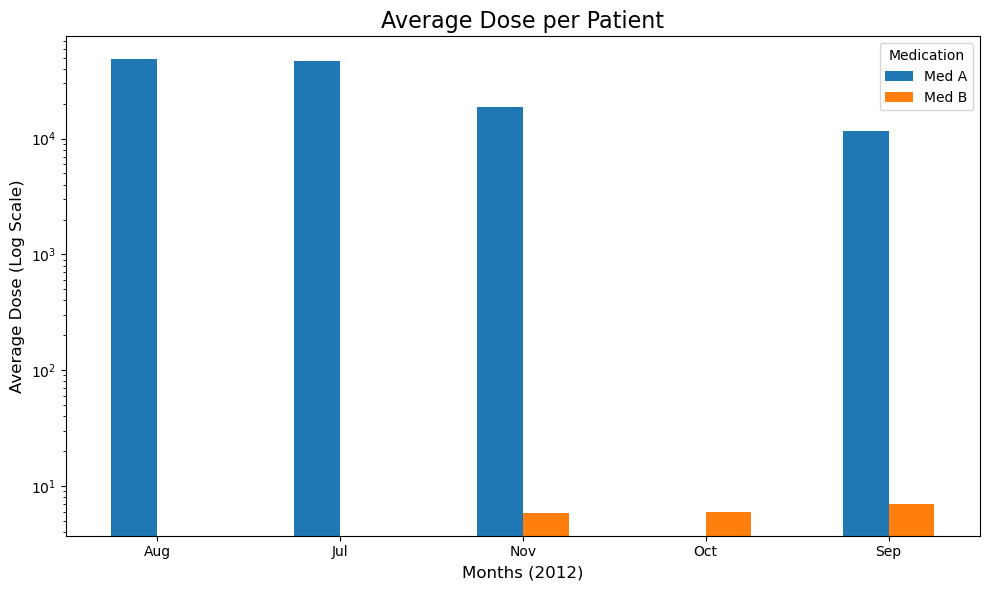

In [37]:
# Plot the bar plot
avg_dose_pivot = avg_dose_per_patient.pivot(index='Month', columns='Medication', values='Avg_Dose_Per_Patient')

avg_dose_pivot.plot(kind='bar', figsize=(10, 6), logy=True)

plt.title('Average Dose per Patient', fontsize=16)
plt.xlabel('Months (2012)', fontsize=12)
plt.ylabel('Average Dose (Log Scale)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

How many patients switched from Medication A to Medication B each month (September, October, November)?

In [38]:
filtered_data = adminDF[(adminDF['admin_date'] >= '2012-09-01') & (adminDF['admin_date'] <= '2012-11-30')]
filtered_data['admin_date'] = filtered_data['admin_date'].dt.strftime("%b")

filtered_data = filtered_data.sort_values(by=['Id', 'admin_date'])

switch_count = filtered_data.groupby(['Id', 'med', 'admin_date']).size().reset_index(name='count')

switch_count['previous_medication'] = switch_count.groupby('Id')['med'].shift(1)

switch_medication = switch_count[(switch_count['previous_medication'] == 'Med A') & (switch_count['med'] == 'Med B')]

total_patient_switch_count = switch_medication.groupby('admin_date')['Id'].nunique().reset_index()

total_patient_switch_count.columns = ['Month', 'Switch_Count_A_to_B']
total_patient_switch_count.sort_values(by=['Month'], ascending=False)

,Month,Switch_Count_A_to_B
2,Sep,6
1,Oct,10
0,Nov,51


How many patients started on Medication B without being on Medication A in the past (September, October, November)?

In [39]:
filtered_data = adminDF[(adminDF['admin_date'] >= '2012-09-01') & (adminDF['admin_date'] <= '2012-11-30') & (adminDF['med'] == 'Med B')]
filtered_data['admin_date'] = filtered_data['admin_date'].dt.strftime("%b")

filtered_data = filtered_data.sort_values(by=['Id', 'admin_date'])

switch_count_sec = filtered_data.groupby(['Id', 'med', 'admin_date']).size().reset_index(name='count')

switch_count_sec['previous_medication'] = switch_count.groupby('Id')['med'].shift(1)

switch_medication_sec = switch_count_sec[(switch_count_sec['previous_medication'] != 'Med A') & (switch_count_sec['med'] == 'Med B')]

total_patient_on_B = switch_medication_sec.groupby('admin_date')['Id'].nunique().reset_index()

total_patient_on_B.columns = ['Month', 'Switch_Count_on_B']
total_patient_on_B = total_patient_on_B.sort_values(by=['Month'], ascending=False)
total_patient_on_B

,Month,Switch_Count_on_B
2,Sep,62
1,Oct,55
0,Nov,50
